In [5]:
import numpy as np
import matplotlib.pyplot as plt



In [53]:
def generate_data(modality):
    b_values = np.linspace(1, 100, 10)
    f_values = np.linspace(1, 100, 10)
    b, f = np.meshgrid(b_values, f_values)
    
    if modality == 'data':
        p = 0.5 + 0.4 * (b/100) + 0.1 * (f/100)
    elif modality == 'structured':
        p = 0.55 + 0.25 * (b/100 + f/100)
    elif modality == 'unstructured':
        p = 0.5 + 0.05 * (b/100) + 0.45 * (f/100)
    
    noise = np.random.normal(0, 0.02, b.shape)
    p += noise
    p = np.clip(p, 0, 1)  # Ensure the final performance stays within [0, 1]
    
    return b, f, p

# Generate data for three modalities
b_data, f_data, p_data = generate_data('data')
b_unstruct, f_unstruct, p_unstruct = generate_data('unstructured')
b_struct, f_struct, p_struct = generate_data('structured')


In [54]:
# Generate data for three modalities
b_data, f_data, p_data = generate_data('data')
b_unstruct, f_unstruct, p_unstruct = generate_data('unstructured')
b_struct, f_struct, p_struct = generate_data('structured')

/tmp/ipykernel_55387/2848080299.py:28: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


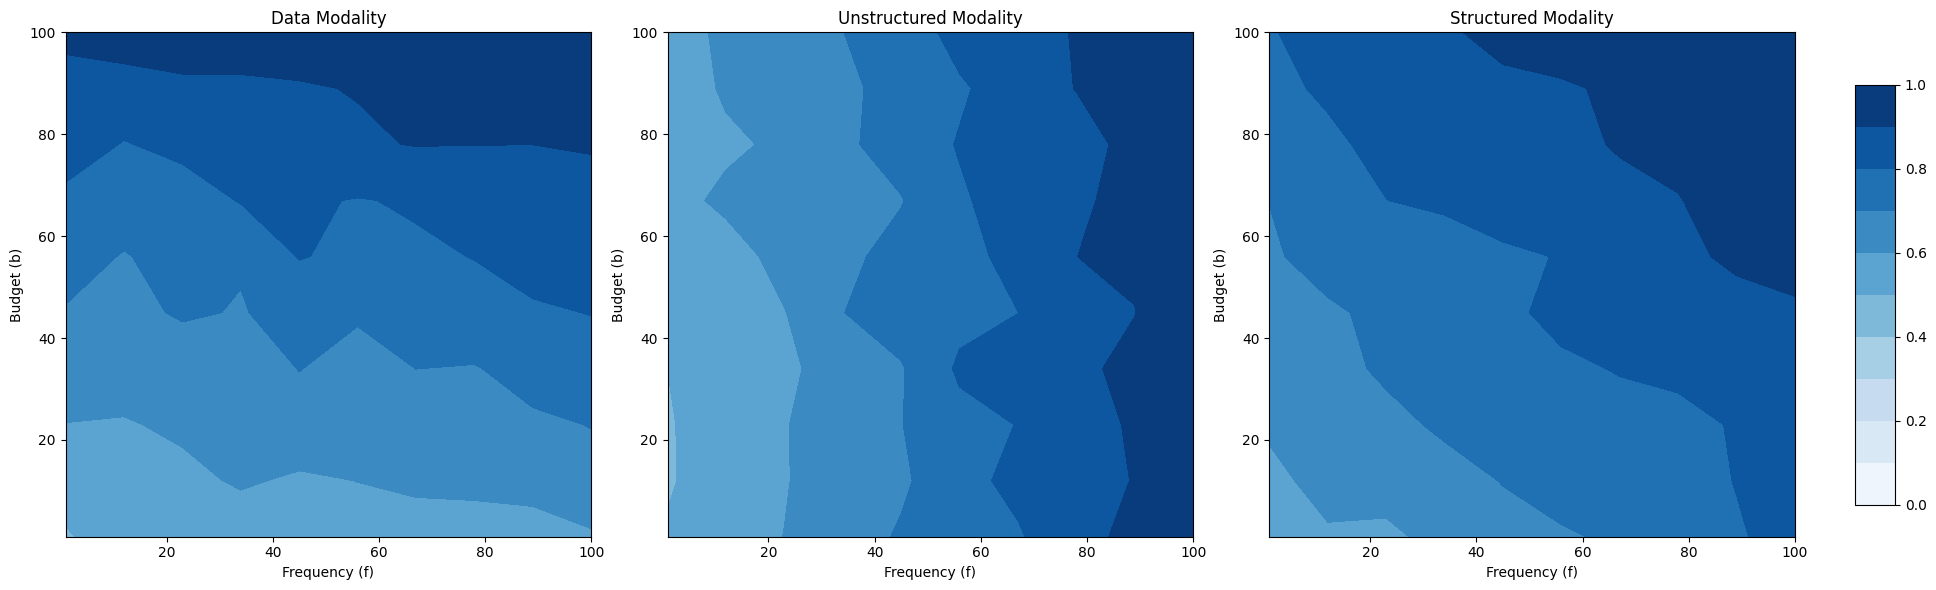

In [55]:
# ... [previous code for data generation]

# Plotting contour plots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

# Contour plot for Data modality
cp_data = axes[0].contourf(f_data, b_data, p_data, cmap='Blues', levels=np.linspace(0, 1, 11))
axes[0].set_title('Data Modality')
axes[0].set_xlabel('Frequency (f)')
axes[0].set_ylabel('Budget (b)')

# Contour plot for Unstructured modality
cp_unstruct = axes[1].contourf(f_unstruct, b_unstruct, p_unstruct, cmap='Blues', levels=np.linspace(0, 1, 11))
axes[1].set_title('Unstructured Modality')
axes[1].set_xlabel('Frequency (f)')
axes[1].set_ylabel('Budget (b)')

# Contour plot for Structured modality
cp_struct = axes[2].contourf(f_struct, b_struct, p_struct, cmap='Blues', levels=np.linspace(0, 1, 11))
axes[2].set_title('Structured Modality')
axes[2].set_xlabel('Frequency (f)')
axes[2].set_ylabel('Budget (b)')

# Create one colorbar for the entire figure
cbar_ax = fig.add_axes([0.93, 0.15, 0.02, 0.7])
fig.colorbar(cp_data, cax=cbar_ax, boundaries=np.linspace(0, 1, 11))

plt.tight_layout()
plt.subplots_adjust(right=0.9)  # Adjust subplot to make room for the colorbar
plt.show();